<a href="https://colab.research.google.com/github/tamandakaunda-15/Summative_Assignment---Model-Training-and-Evaluation/blob/main/Summative_Intro_to_ml_Tamanda_Kaunda_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")

Libraries imported successfully!
TensorFlow version: 2.18.0


# The Dataset
he problem is to predict student dropout based on various academic and demographic factors.
The dataset contains information about students including their grades, family background,
study habits, and social factors. This is a binary classification problem where we predict
whether a student will drop out (True) or continue their studies (False).

**Features include:**
- Academic performance (grades, study time, failures)
- Demographics (age, gender, address)
- Family factors (education, job, support)
- Social factors (relationships, activities, alcohol consumption)

In [6]:
# Load Data
def load_and_preprocess_data():
    # Load the dataset
    df = pd.read_csv('student_dropout.csv')

    print("Dataset Shape:", df.shape)
    print("\nFirst few rows:")
    print(df.head())

    print("\nDataset Info:")
    print(df.info())

    print("\nTarget Distribution:")
    print(df['Dropped_Out'].value_counts())

    return df

# Load and explore data
df = load_and_preprocess_data()

# Data preprocessing
def preprocess_data(df):
    # Separate features and target
    X = df.drop('Dropped_Out', axis=1)
    y = df['Dropped_Out']

    # Encode categorical variables
    categorical_columns = X.select_dtypes(include=['object']).columns
    le_dict = {}

    for col in categorical_columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        le_dict[col] = le

    # Convert boolean target to int
    y = y.astype(int)

    print(f"Features shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    print(f"Categorical columns encoded: {list(categorical_columns)}")

    return X, y, le_dict

X, y, label_encoders = preprocess_data(df)

# Split data into train, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed!")

Dataset Shape: (649, 34)

First few rows:
  School Gender  Age Address Family_Size Parental_Status  Mother_Education  \
0     GP      F   18       U         GT3               A                 4   
1     GP      F   17       U         GT3               T                 1   
2     GP      F   15       U         LE3               T                 1   
3     GP      F   15       U         GT3               T                 4   
4     GP      F   16       U         GT3               T                 3   

   Father_Education Mother_Job Father_Job  ... Free_Time Going_Out  \
0                 4    at_home    teacher  ...         3         4   
1                 1    at_home      other  ...         3         3   
2                 1    at_home      other  ...         3         2   
3                 2     health   services  ...         2         2   
4                 3      other      other  ...         3         2   

   Weekend_Alcohol_Consumption  Weekday_Alcohol_Consumption  Health_

#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*v1ohAG82xmU6WGsG2hoE8g.png" alt="?" style="width:25px"/>




#Task: Define a function that creates models without and With specified Optimization techniques


In [7]:
def define_model(optimization='adam', regularization=None, early_stopping=True, dropout=0.0, learning_rate=0.001):
    """
    Create a neural network model with specified optimization and regularization techniques

    Args:
        optimization: optimizer type ('adam', 'rmsprop', 'sgd')
        regularization: regularization type (None, 'l1', 'l2', 'l1_l2')
        early_stopping: whether to use early stopping
        dropout: dropout rate (0.0 to 1.0)
        learning_rate: learning rate for optimizer
    """

    # Define regularizer
    reg = None
    if regularization == 'l1':
        reg = l1(0.01)
    elif regularization == 'l2':
        reg = l2(0.01)
    elif regularization == 'l1_l2':
        reg = l1_l2(l1=0.01, l2=0.01)

    # Create model
    model = Sequential()

    # Input layer and first hidden layer
    model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],),
                   kernel_regularizer=reg, name='hidden_1'))

    # Add dropout if specified
    if dropout > 0:
        model.add(Dropout(dropout, name='dropout_1'))

    # Second hidden layer
    model.add(Dense(32, activation='relu', kernel_regularizer=reg, name='hidden_2'))

    # Add dropout if specified
    if dropout > 0:
        model.add(Dropout(dropout, name='dropout_2'))

    # Output layer
    model.add(Dense(1, activation='sigmoid', name='output'))

    # Define optimizer
    if optimization.lower() == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimization.lower() == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimization.lower() == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    else:
        optimizer = Adam(learning_rate=learning_rate)

    # Compile model
    model.compile(optimizer=optimizer,
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    # Define callbacks
    callbacks = []
    if early_stopping:
        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        callbacks.append(early_stop)

    # Model checkpoint to save best model
    checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
    callbacks.append(checkpoint)

    print(f"Model created with:")
    print(f"- Optimizer: {optimization}")
    print(f"- Regularization: {regularization}")
    print(f"- Dropout: {dropout}")
    print(f"- Learning rate: {learning_rate}")
    print(f"- Early stopping: {early_stopping}")

    return model, callbacks

# Task: Print out the Final Model Accuracy and plot the Loss curve

BASELINE MODEL - No Optimization Techniques
Model created with:
- Optimizer: adam
- Regularization: None
- Dropout: 0.0
- Learning rate: 0.001
- Early stopping: False


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 64)             │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.1875 - loss: 1.1255

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.2782 - loss: 0.9306 - val_accuracy: 0.6846 - val_loss: 0.6225
Epoch 2/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6875 - loss: 0.6000

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7566 - loss: 0.5483 - val_accuracy: 0.8538 - val_loss: 0.4584
Epoch 3/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9375 - loss: 0.3439

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8591 - loss: 0.3905 - val_accuracy: 0.8615 - val_loss: 0.3884
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8699 - loss: 0.3087 - val_accuracy: 0.8615 - val_loss: 0.3414
Epoch 5/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.7812 - loss: 0.3254

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8668 - loss: 0.2626 - val_accuracy: 0.8769 - val_loss: 0.3123
Epoch 6/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8438 - loss: 0.2623

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8898 - loss: 0.2339 - val_accuracy: 0.8846 - val_loss: 0.2917
Epoch 7/50
 1/13 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.9688 - loss: 0.1845

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9379 - loss: 0.1985 - val_accuracy: 0.8923 - val_loss: 0.2793
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9667 - loss: 0.1531 - val_accuracy: 0.8769 - val_loss: 0.2734
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9519 - loss: 0.1510 - val_accuracy: 0.8769 - val_loss: 0.2685
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9567 - loss: 0.1419 - val_accuracy: 0.8846 - val_loss: 0.2643
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9709 - loss: 0.1159 - val_accuracy: 0.8846 - val_loss: 0.2673
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9674 - loss: 0.1130 - val_accuracy: 0.8923 - val_loss: 0.2684
Epoch 13/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9701 - loss: 0.1106 - val_accuracy: 0.8923 - val_loss: 0.2670
Epoch 14/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9860 - loss: 0.0814 - val_accuracy: 0.8923 - val_loss: 0.2

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9970 - loss: 0.0422 - val_accuracy: 0.9000 - val_loss: 0.2935
Epoch 22/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9939 - loss: 0.0331 - val_accuracy: 0.9000 - val_loss: 0.2954
Epoch 23/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9968 - loss: 0.0279 - val_accuracy: 0.9000 - val_loss: 0.3009
Epoch 24/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9989 - loss: 0.0241 - val_accuracy: 0.9000 - val_loss: 0.3054
Epoch 25/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9958 - loss: 0.0231 - val_accuracy: 0.9000 - val_loss: 0.3043
Epoch 26/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0240 - val_accuracy: 0.9000 - val_loss: 0.3054
Epoch 27/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0147 - val_accuracy: 0.9000 - val_loss: 0.3098
Epoch 28/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0156 - val_accuracy: 0.9000 - val_loss: 0

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0108 - val_accuracy: 0.9077 - val_loss: 0.3331
Epoch 36/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0093 - val_accuracy: 0.9077 - val_loss: 0.3370
Epoch 37/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 0.9077 - val_loss: 0.3409
Epoch 38/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0088 - val_accuracy: 0.9077 - val_loss: 0.3448
Epoch 39/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0073 - val_accuracy: 0.9077 - val_loss: 0.3473
Epoch 40/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 0.9077 - val_loss: 0.3493
Epoch 41/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.9077 - val_loss: 0.3533
Epoch 42/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 0.9077 - val_los

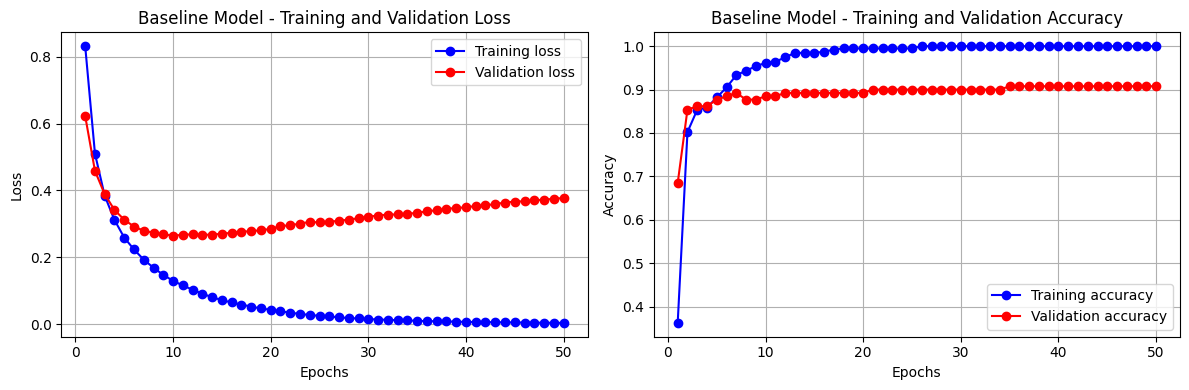


Baseline Model Final Metrics:
Training Accuracy: 1.0000
Validation Accuracy: 0.9077
Training Loss: 0.0036
Validation Loss: 0.3775
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Baseline Model Test Set Performance:
Accuracy: 0.9538
Precision: 0.8182
Recall: 0.9000
F1-Score: 0.8571
AUC-ROC: 0.9532


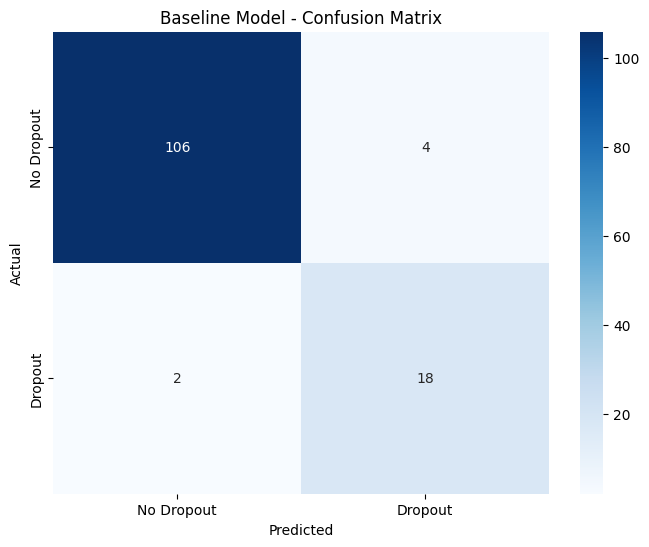

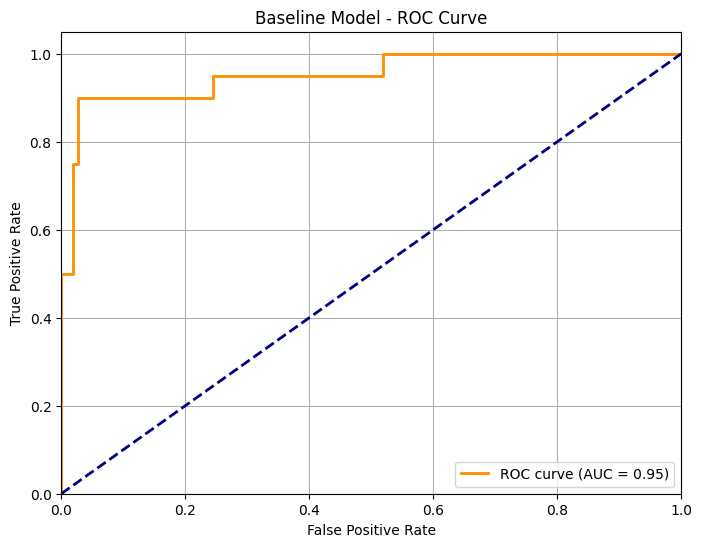

In [8]:
def loss_curve_plot(history, model_name="Model"):
    """Plot training and validation loss curves"""
    if history is None:
        print("No history available for plotting")
        return

    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(12, 4))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], 'bo-', label='Training loss')
    plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation loss')
    plt.title(f'{model_name} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation accuracy')
    plt.title(f'{model_name} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Print final metrics
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    print(f"\n{model_name} Final Metrics:")
    print(f"Training Accuracy: {final_train_acc:.4f}")
    print(f"Validation Accuracy: {final_val_acc:.4f}")
    print(f"Training Loss: {final_train_loss:.4f}")
    print(f"Validation Loss: {final_val_loss:.4f}")

def evaluate_model(model, X_test, y_test, model_name="Model"):
    """Evaluate model and print classification metrics"""
    # Make predictions
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int).flatten()

    # Calculate metrics
    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    print(f"\n{model_name} Test Set Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Dropout', 'Dropout'],
                yticklabels=['No Dropout', 'Dropout'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_roc': auc
    }

# Baseline Model (No optimization techniques)
print("="*50)
print("BASELINE MODEL - No Optimization Techniques")
print("="*50)

baseline_model, baseline_callbacks = define_model(
    optimization='adam',
    regularization=None,
    early_stopping=False,
    dropout=0.0,
    learning_rate=0.001
)

baseline_model.summary()

# Train baseline model
baseline_history = baseline_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=32,
    callbacks=baseline_callbacks,
    verbose=1
)

# Plot results and evaluate
loss_curve_plot(baseline_history, "Baseline Model")
baseline_metrics = evaluate_model(baseline_model, X_test_scaled, y_test, "Baseline Model")

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

MODEL 2 - Adam + L2 Regularization + Dropout
Model created with:
- Optimizer: adam
- Regularization: l2
- Dropout: 0.3
- Learning rate: 0.001
- Early stopping: True


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 64)             │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6173 - loss: 1.5477

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.6260 - loss: 1.5413 - val_accuracy: 0.8615 - val_loss: 1.3442
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8163 - loss: 1.3292 - val_accuracy: 0.8615 - val_loss: 1.2399
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8418 - loss: 1.2195 - val_accuracy: 0.8538 - val_loss: 1.1625
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8752 - loss: 1.1108 - val_accuracy: 0.8385 - val_loss: 1.0999
Epoch 5/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.8125 - loss: 1.1062

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8434 - loss: 1.0805 - val_accuracy: 0.8769 - val_loss: 1.0454
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8685 - loss: 1.0141 - val_accuracy: 0.8615 - val_loss: 0.9967
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8704 - loss: 0.9750 - val_accuracy: 0.8615 - val_loss: 0.9524
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8921 - loss: 0.9113 - val_accuracy: 0.8615 - val_loss: 0.9128
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9058 - loss: 0.8660 - val_accuracy: 0.8615 - val_loss: 0.8740
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9062 - loss: 0.8264 - val_accuracy: 0.8615 - val_loss: 0.8374
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9162 - loss: 0.7838 - val_accuracy: 0.8769 - val_loss: 0.8053
Epoch 12/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9062 - loss: 0.7879

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9279 - loss: 0.7556 - val_accuracy: 0.8846 - val_loss: 0.7771
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9514 - loss: 0.7020 - val_accuracy: 0.8692 - val_loss: 0.7518
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9474 - loss: 0.6619 - val_accuracy: 0.8692 - val_loss: 0.7270
Epoch 15/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9062 - loss: 0.6797

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9200 - loss: 0.6526 - val_accuracy: 0.8923 - val_loss: 0.7029
Epoch 16/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9431 - loss: 0.6176 - val_accuracy: 0.8923 - val_loss: 0.6793
Epoch 17/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9534 - loss: 0.5812 - val_accuracy: 0.8846 - val_loss: 0.6566
Epoch 18/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9492 - loss: 0.5503 - val_accuracy: 0.8923 - val_loss: 0.6375
Epoch 19/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9629 - loss: 0.5226 - val_accuracy: 0.8923 - val_loss: 0.6197
Epoch 20/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9532 - loss: 0.5247 - val_accuracy: 0.8846 - val_loss: 0.6027
Epoch 21/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9745 - loss: 0.4724 - val_accuracy: 0.8923 - val_loss: 0.5891
Epoch 22/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9491 - loss: 0.4650 - val_accuracy: 0.8846 - val

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9666 - loss: 0.4354 - val_accuracy: 0.9000 - val_loss: 0.5553
Epoch 24/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9621 - loss: 0.4679 - val_accuracy: 0.8923 - val_loss: 0.5451
Epoch 25/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9493 - loss: 0.4271 - val_accuracy: 0.8846 - val_loss: 0.5333
Epoch 26/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9845 - loss: 0.3743 - val_accuracy: 0.8846 - val_loss: 0.5226
Epoch 27/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9596 - loss: 0.3931 - val_accuracy: 0.8923 - val_loss: 0.5124
Epoch 28/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9686 - loss: 0.3742 - val_accuracy: 0.8846 - val_loss: 0.4993
Epoch 29/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9915 - loss: 0.3443 - val_accuracy: 0.8923 - val_loss: 0.4889
Epoch 30/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9795 - loss: 0.3366 - val_accuracy: 0.8846 - v

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9349 - loss: 0.3353 - val_accuracy: 0.9077 - val_loss: 0.4471
Epoch 34/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9905 - loss: 0.2959 - val_accuracy: 0.9000 - val_loss: 0.4377
Epoch 35/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9848 - loss: 0.2795 - val_accuracy: 0.9000 - val_loss: 0.4344
Epoch 36/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9785 - loss: 0.2875 - val_accuracy: 0.9077 - val_loss: 0.4304
Epoch 37/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9785 - loss: 0.2699 - val_accuracy: 0.8923 - val_loss: 0.4211
Epoch 38/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9864 - loss: 0.2543 - val_accuracy: 0.9000 - val_loss: 0.4097
Epoch 39/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9884 - loss: 0.2437 - val_accuracy: 0.9077 - val_loss: 0.4020
Epoch 40/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9869 - loss: 0.2493 - val_accuracy: 0.9077 - 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9948 - loss: 0.2178 - val_accuracy: 0.9154 - val_loss: 0.3806
Epoch 43/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9843 - loss: 0.2204 - val_accuracy: 0.9154 - val_loss: 0.3797
Epoch 44/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9988 - loss: 0.2054 - val_accuracy: 0.9154 - val_loss: 0.3752
Epoch 45/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9910 - loss: 0.2078 - val_accuracy: 0.9000 - val_loss: 0.3764
Epoch 46/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9937 - loss: 0.1975 - val_accuracy: 0.9000 - val_loss: 0.3709
Epoch 47/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9918 - loss: 0.2027 - val_accuracy: 0.9154 - val_loss: 0.3681
Epoch 48/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9948 - loss: 0.1849 - val_accuracy: 0.9154 - val_loss: 0.3609
Epoch 49/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9835 - loss: 0.1928 - val_accuracy: 0.9154 - val_

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9975 - loss: 0.1643 - val_accuracy: 0.9231 - val_loss: 0.3321
Epoch 55/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9891 - loss: 0.1564 - val_accuracy: 0.9077 - val_loss: 0.3397
Epoch 56/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9902 - loss: 0.1557 - val_accuracy: 0.9231 - val_loss: 0.3347
Epoch 57/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9949 - loss: 0.1594 - val_accuracy: 0.9077 - val_loss: 0.3331
Epoch 58/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9896 - loss: 0.1585 - val_accuracy: 0.9154 - val_loss: 0.3209
Epoch 59/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9990 - loss: 0.1429 - val_accuracy: 0.9077 - val_loss: 0.3156
Epoch 60/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9982 - loss: 0.1386 - val_accuracy: 0.9077 - val_loss: 0.3164
Epoch 61/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9933 - loss: 0.1359 - val_accuracy: 0.9231 - val_

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9918 - loss: 0.1499 - val_accuracy: 0.9308 - val_loss: 0.3146
Epoch 64/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9944 - loss: 0.1428 - val_accuracy: 0.9077 - val_loss: 0.3131
Epoch 65/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9919 - loss: 0.1394 - val_accuracy: 0.9154 - val_loss: 0.3065
Epoch 66/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9968 - loss: 0.1333 - val_accuracy: 0.9308 - val_loss: 0.3008
Epoch 67/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9926 - loss: 0.1354 - val_accuracy: 0.9231 - val_loss: 0.2984
Epoch 68/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9894 - loss: 0.1294 - val_accuracy: 0.9308 - val_loss: 0.2973
Epoch 69/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9972 - loss: 0.1271 - val_accuracy: 0.9308 - val_loss: 0.2947
Epoch 70/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9940 - loss: 0.1218 - val_accuracy: 0.9231 - val_

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9949 - loss: 0.1145 - val_accuracy: 0.9462 - val_loss: 0.2595
Epoch 80/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9954 - loss: 0.1100 - val_accuracy: 0.9385 - val_loss: 0.2572
Epoch 81/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9982 - loss: 0.1005 - val_accuracy: 0.9308 - val_loss: 0.2598
Epoch 82/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9931 - loss: 0.1071 - val_accuracy: 0.9308 - val_loss: 0.2586
Epoch 83/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9934 - loss: 0.1081 - val_accuracy: 0.9385 - val_loss: 0.2581
Epoch 84/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9916 - loss: 0.1120 - val_accuracy: 0.9231 - val_loss: 0.2601
Epoch 85/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9953 - loss: 0.0998 - val_accuracy: 0.9385 - val_loss: 0.2574
Epoch 86/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9882 - loss: 0.1196 - val_accuracy: 0.9077 - val_

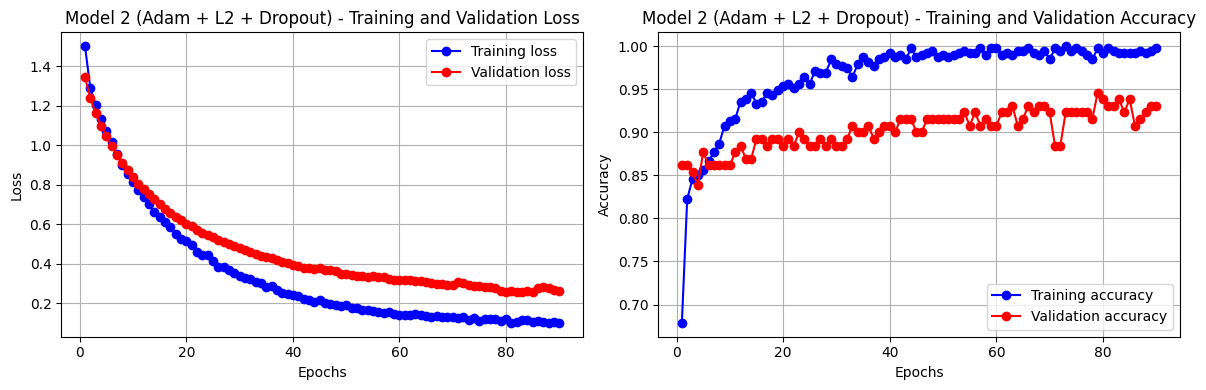


Model 2 (Adam + L2 + Dropout) Final Metrics:
Training Accuracy: 0.9974
Validation Accuracy: 0.9308
Training Loss: 0.1015
Validation Loss: 0.2641
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Model 2 (Adam + L2 + Dropout) Test Set Performance:
Accuracy: 0.9615
Precision: 0.8571
Recall: 0.9000
F1-Score: 0.8780
AUC-ROC: 0.9755


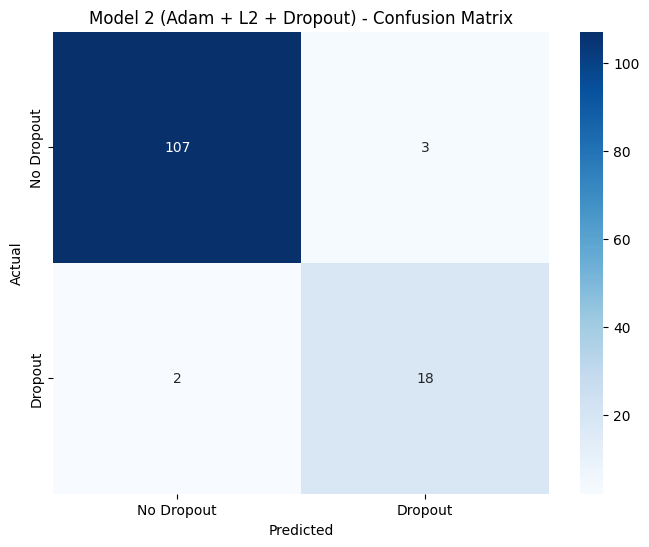

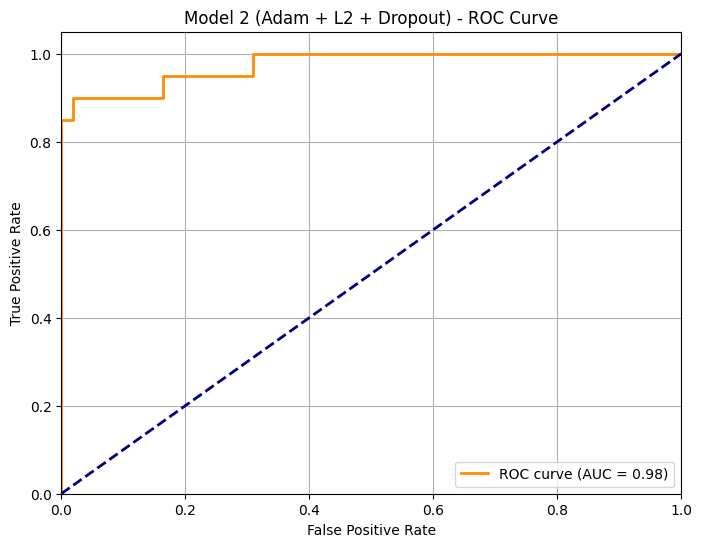

In [9]:
#Model 2: Adam + L2 regularization and Dropout
print("="*50)
print("MODEL 2 - Adam + L2 Regularization + Dropout")
print("="*50)

model_2, callbacks_2 = define_model(
    optimization='adam',
    regularization='l2',
    early_stopping=True,
    dropout=0.3,
    learning_rate=0.001
)

model_2.summary()

history_2 = model_2.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks_2,
    verbose=1
)

loss_curve_plot(history_2, "Model 2 (Adam + L2 + Dropout)")
metrics_2 = evaluate_model(model_2, X_test_scaled, y_test, "Model 2 (Adam + L2 + Dropout)")

MODEL 3 - RMSprop + L1 Regularization + Early Stopping
Model created with:
- Optimizer: rmsprop
- Regularization: l1
- Dropout: 0.2
- Learning rate: 0.001
- Early stopping: True


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 64)             │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.4375 - loss: 6.0061

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6105 - loss: 5.7286 - val_accuracy: 0.7692 - val_loss: 5.2413
Epoch 2/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7812 - loss: 5.2340

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8087 - loss: 5.1164 - val_accuracy: 0.8538 - val_loss: 4.8133
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8624 - loss: 4.6816 - val_accuracy: 0.8538 - val_loss: 4.4293
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8371 - loss: 4.3371 - val_accuracy: 0.8538 - val_loss: 4.0611
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8112 - loss: 3.9775 - val_accuracy: 0.8538 - val_loss: 3.7079
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8369 - loss: 3.6089 - val_accuracy: 0.8538 - val_loss: 3.3750
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8743 - loss: 3.2663 - val_accuracy: 0.8538 - val_loss: 3.0599
Epoch 8/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.8125 - loss: 3.0960

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8489 - loss: 2.9711 - val_accuracy: 0.8615 - val_loss: 2.7625
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8553 - loss: 2.6876 - val_accuracy: 0.8615 - val_loss: 2.4737
Epoch 10/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8438 - loss: 2.4451

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8613 - loss: 2.3902 - val_accuracy: 0.8692 - val_loss: 2.2025
Epoch 11/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9062 - loss: 2.1617

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8826 - loss: 2.1087 - val_accuracy: 0.8769 - val_loss: 1.9488
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8698 - loss: 1.8861 - val_accuracy: 0.8769 - val_loss: 1.7229
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8843 - loss: 1.6485 - val_accuracy: 0.8769 - val_loss: 1.5099
Epoch 14/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.9375 - loss: 1.4248

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9071 - loss: 1.3983 - val_accuracy: 0.8846 - val_loss: 1.3317
Epoch 15/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9035 - loss: 1.2609 - val_accuracy: 0.8769 - val_loss: 1.1672
Epoch 16/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8125 - loss: 1.2065

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8836 - loss: 1.1118 - val_accuracy: 0.9000 - val_loss: 1.0188
Epoch 17/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9012 - loss: 0.9603 - val_accuracy: 0.8846 - val_loss: 0.8904
Epoch 18/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8772 - loss: 0.8528 - val_accuracy: 0.8846 - val_loss: 0.7804
Epoch 19/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8901 - loss: 0.7592 - val_accuracy: 0.8846 - val_loss: 0.6973
Epoch 20/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8897 - loss: 0.6627 - val_accuracy: 0.9000 - val_loss: 0.6299
Epoch 21/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8986 - loss: 0.6051 - val_accuracy: 0.9000 - val_loss: 0.5787
Epoch 22/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - accuracy: 0.9375 - loss: 0.5245

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9176 - loss: 0.5468 - val_accuracy: 0.9154 - val_loss: 0.5391
Epoch 23/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9164 - loss: 0.5025 - val_accuracy: 0.9154 - val_loss: 0.5072
Epoch 24/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9336 - loss: 0.4787 - val_accuracy: 0.9154 - val_loss: 0.4829
Epoch 25/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9406 - loss: 0.4632 - val_accuracy: 0.9154 - val_loss: 0.4687
Epoch 26/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9274 - loss: 0.4570 - val_accuracy: 0.9154 - val_loss: 0.4430
Epoch 27/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9062 - loss: 0.4272

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9236 - loss: 0.4282 - val_accuracy: 0.9231 - val_loss: 0.4296
Epoch 28/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9330 - loss: 0.3979 - val_accuracy: 0.9154 - val_loss: 0.4162
Epoch 29/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9539 - loss: 0.3707 - val_accuracy: 0.9154 - val_loss: 0.4035
Epoch 30/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9326 - loss: 0.3694 - val_accuracy: 0.9231 - val_loss: 0.3937
Epoch 31/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9341 - loss: 0.3612 - val_accuracy: 0.9154 - val_loss: 0.3844
Epoch 32/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9139 - loss: 0.3932 - val_accuracy: 0.9154 - val_loss: 0.3807
Epoch 33/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9518 - loss: 0.3522 - val_accuracy: 0.9231 - val_loss: 0.3699
Epoch 34/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9627 - loss: 0.3274 - val_accuracy: 0.9231 - val_

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9412 - loss: 0.3241 - val_accuracy: 0.9308 - val_loss: 0.3345
Epoch 40/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9501 - loss: 0.3063 - val_accuracy: 0.9308 - val_loss: 0.3269
Epoch 41/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9528 - loss: 0.3080 - val_accuracy: 0.9231 - val_loss: 0.3342
Epoch 42/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9613 - loss: 0.2939 - val_accuracy: 0.9308 - val_loss: 0.3192
Epoch 43/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9491 - loss: 0.3049 - val_accuracy: 0.9231 - val_loss: 0.3166
Epoch 44/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9514 - loss: 0.3131 - val_accuracy: 0.9308 - val_loss: 0.3105
Epoch 45/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9339 - loss: 0.3125 - val_accuracy: 0.9231 - val_loss: 0.3228
Epoch 46/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9389 - loss: 0.3151 - val_accuracy: 0.9231 - val_

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9311 - loss: 0.3053 - val_accuracy: 0.9385 - val_loss: 0.3010
Epoch 52/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9626 - loss: 0.2812 - val_accuracy: 0.9308 - val_loss: 0.2993
Epoch 53/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9551 - loss: 0.2754 - val_accuracy: 0.9385 - val_loss: 0.2934
Epoch 54/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9478 - loss: 0.2964 - val_accuracy: 0.9308 - val_loss: 0.2996
Epoch 55/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9346 - loss: 0.2995 - val_accuracy: 0.9308 - val_loss: 0.2892
Epoch 56/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9315 - loss: 0.2916 - val_accuracy: 0.9385 - val_loss: 0.3038
Epoch 57/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9311 - loss: 0.3019 - val_accuracy: 0.9308 - val_loss: 0.2904
Epoch 58/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9389 - loss: 0.2791 - val_accuracy: 0.9385 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9784 - loss: 0.2577 - val_accuracy: 0.9462 - val_loss: 0.2796
Epoch 63/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9639 - loss: 0.2575 - val_accuracy: 0.9462 - val_loss: 0.2806
Epoch 64/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9824 - loss: 0.2547 - val_accuracy: 0.9308 - val_loss: 0.2780
Epoch 65/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9558 - loss: 0.2873 - val_accuracy: 0.9308 - val_loss: 0.2854
Epoch 66/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9449 - loss: 0.2644 - val_accuracy: 0.9385 - val_loss: 0.2702
Epoch 67/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9375 - loss: 0.2772

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9506 - loss: 0.2682 - val_accuracy: 0.9538 - val_loss: 0.2741
Epoch 68/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9621 - loss: 0.2414 - val_accuracy: 0.9385 - val_loss: 0.2729
Epoch 69/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9483 - loss: 0.2708 - val_accuracy: 0.9385 - val_loss: 0.2663
Epoch 70/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9682 - loss: 0.2496 - val_accuracy: 0.9462 - val_loss: 0.2659
Epoch 71/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9606 - loss: 0.2703 - val_accuracy: 0.9462 - val_loss: 0.2623
Epoch 72/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9626 - loss: 0.2524 - val_accuracy: 0.9462 - val_loss: 0.2612
Epoch 73/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9576 - loss: 0.2562 - val_accuracy: 0.9462 - val_loss: 0.2637
Epoch 74/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9678 - loss: 0.2582 - val_accuracy: 0.9462 - va

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9545 - loss: 0.2444 - val_accuracy: 0.9615 - val_loss: 0.2631
Epoch 82/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9545 - loss: 0.2739 - val_accuracy: 0.9538 - val_loss: 0.2526
Epoch 83/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9696 - loss: 0.2376 - val_accuracy: 0.9538 - val_loss: 0.2477
Epoch 84/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9663 - loss: 0.2439 - val_accuracy: 0.9462 - val_loss: 0.2481
Epoch 85/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9537 - loss: 0.2802 - val_accuracy: 0.9462 - val_loss: 0.2463
Epoch 86/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9433 - loss: 0.2554 - val_accuracy: 0.9462 - val_loss: 0.2526
Epoch 87/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9555 - loss: 0.2343 - val_accuracy: 0.9462 - val_loss: 0.2446
Epoch 88/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9693 - loss: 0.2357 - val_accuracy: 0.9538 - val_

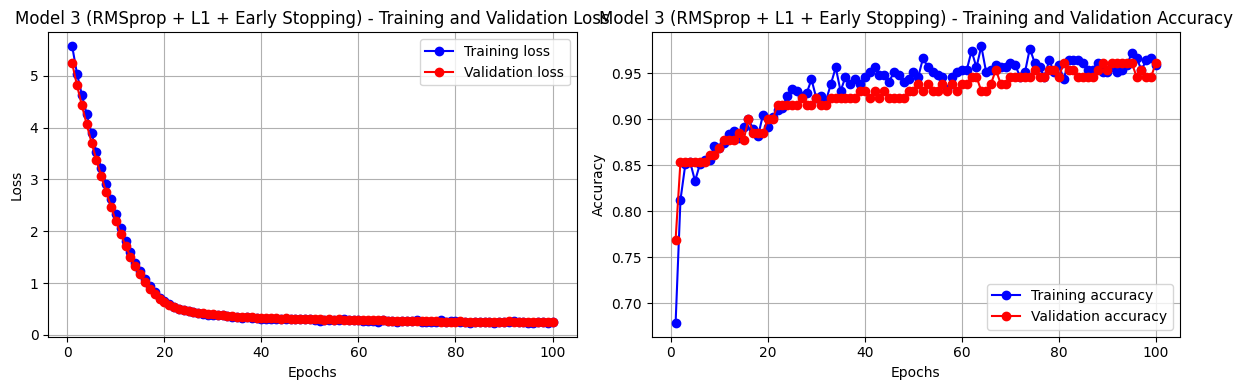


Model 3 (RMSprop + L1 + Early Stopping) Final Metrics:
Training Accuracy: 0.9589
Validation Accuracy: 0.9615
Training Loss: 0.2504
Validation Loss: 0.2412
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Model 3 (RMSprop + L1 + Early Stopping) Test Set Performance:
Accuracy: 0.9846
Precision: 1.0000
Recall: 0.9000
F1-Score: 0.9474
AUC-ROC: 0.9914


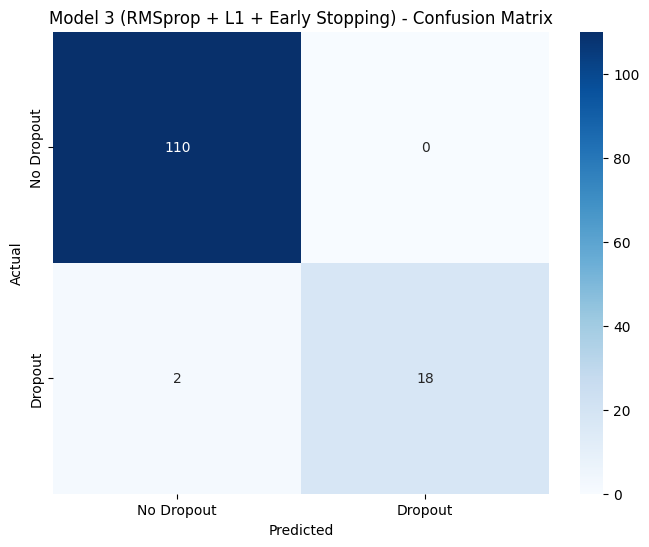

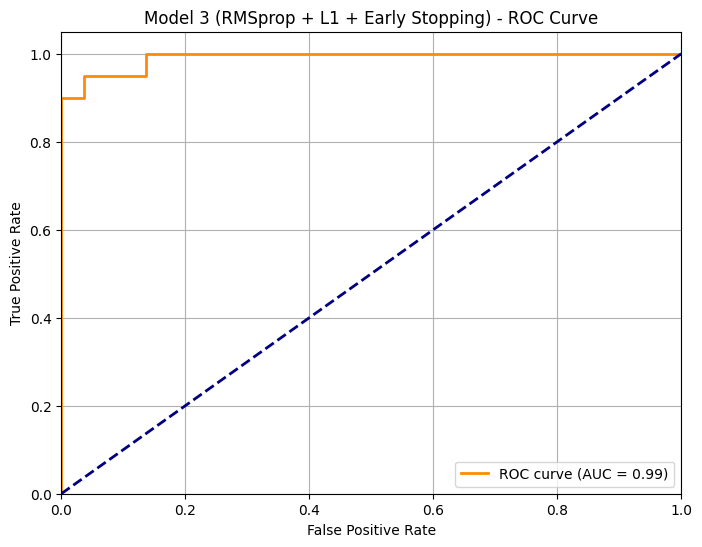

In [10]:
#Model 3: RMSprop + L1 regularizer
print("="*50)
print("MODEL 3 - RMSprop + L1 Regularization + Early Stopping")
print("="*50)

model_3, callbacks_3 = define_model(
    optimization='rmsprop',
    regularization='l1',
    early_stopping=True,
    dropout=0.2,
    learning_rate=0.001
)

model_3.summary()

history_3 = model_3.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks_3,
    verbose=1
)

loss_curve_plot(history_3, "Model 3 (RMSprop + L1 + Early Stopping)")
metrics_3 = evaluate_model(model_3, X_test_scaled, y_test, "Model 3 (RMSprop + L1 + Early Stopping)")

MODEL 4 - SGD + L1_L2 Regularization + High Dropout
Model created with:
- Optimizer: sgd
- Regularization: l1_l2
- Dropout: 0.4
- Learning rate: 0.01
- Early stopping: True


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 64)             │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
 1/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5938 - loss: 6.7162

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6341 - loss: 6.6981 - val_accuracy: 0.8538 - val_loss: 6.5197
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7195 - loss: 6.5431 - val_accuracy: 0.8538 - val_loss: 6.3991
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7929 - loss: 6.3829 - val_accuracy: 0.8538 - val_loss: 6.2901
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7981 - loss: 6.2974 - val_accuracy: 0.8462 - val_loss: 6.1895
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8614 - loss: 6.1650 - val_accuracy: 0.8462 - val_loss: 6.0952
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8370 - loss: 6.1249 - val_accuracy: 0.8462 - val_loss: 6.0016
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8167 - loss: 6.0026 - val_accuracy: 0.8462 - val_loss: 5.9117
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8437 - loss: 5.9188 - val_accuracy: 0.8462 - val_loss

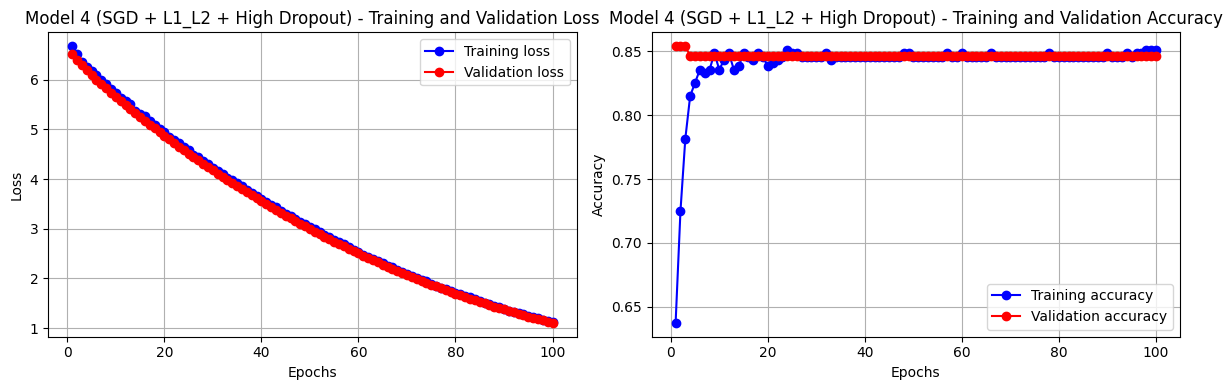


Model 4 (SGD + L1_L2 + High Dropout) Final Metrics:
Training Accuracy: 0.8509
Validation Accuracy: 0.8462
Training Loss: 1.1206
Validation Loss: 1.1054
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Model 4 (SGD + L1_L2 + High Dropout) Test Set Performance:
Accuracy: 0.8462
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
AUC-ROC: 0.9745


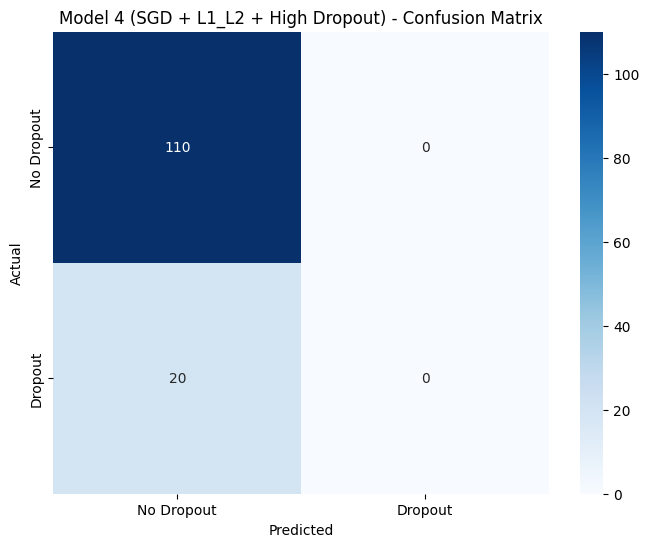

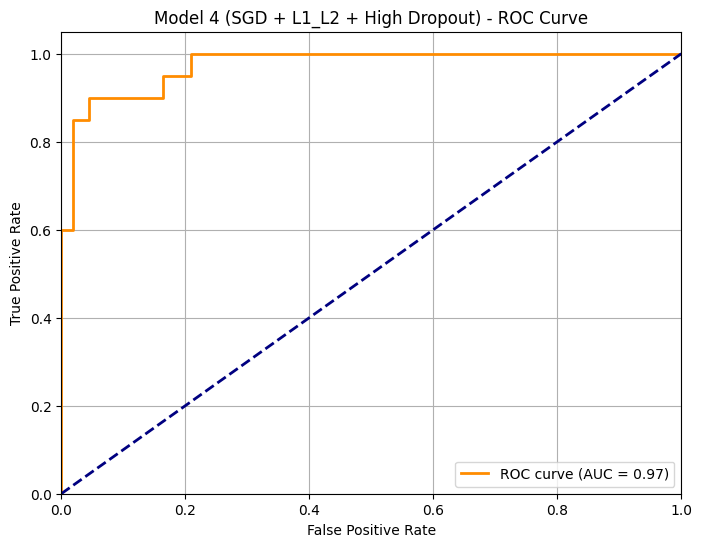

In [11]:
#Model 4: SDG optimizer with L1_L2 Regularizer + High Dropout
print("="*50)
print("MODEL 4 - SGD + L1_L2 Regularization + High Dropout")
print("="*50)

model_4, callbacks_4 = define_model(
    optimization='sgd',
    regularization='l1_l2',
    early_stopping=True,
    dropout=0.4,
    learning_rate=0.01  # Higher learning rate for SGD
)

model_4.summary()

history_4 = model_4.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks_4,
    verbose=1
)

loss_curve_plot(history_4, "Model 4 (SGD + L1_L2 + High Dropout)")
metrics_4 = evaluate_model(model_4, X_test_scaled, y_test, "Model 4 (SGD + L1_L2 + High Dropout)")


#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

Model loaded successfully from best_model.h5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predictions made successfully!
Number of predictions: 130
Predicted dropouts: 4
Predicted non-dropouts: 126

FINAL EVALUATION WITH BEST SAVED MODEL


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Best Saved Model Test Set Performance:
Accuracy: 0.8615
Precision: 0.7500
Recall: 0.1500
F1-Score: 0.2500
AUC-ROC: 0.5955


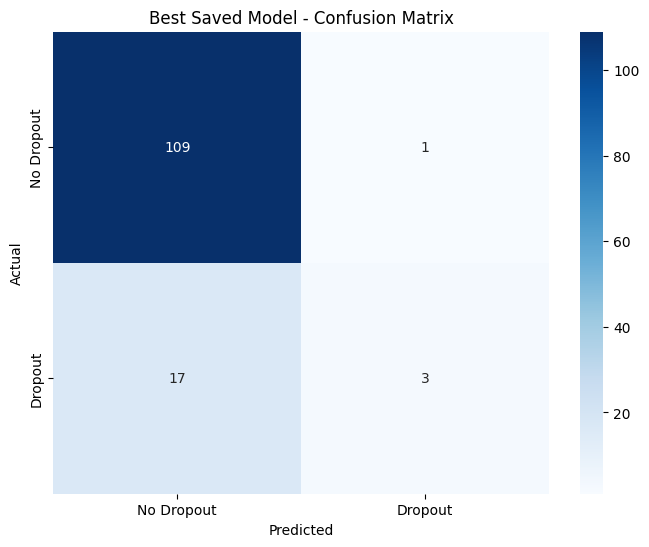

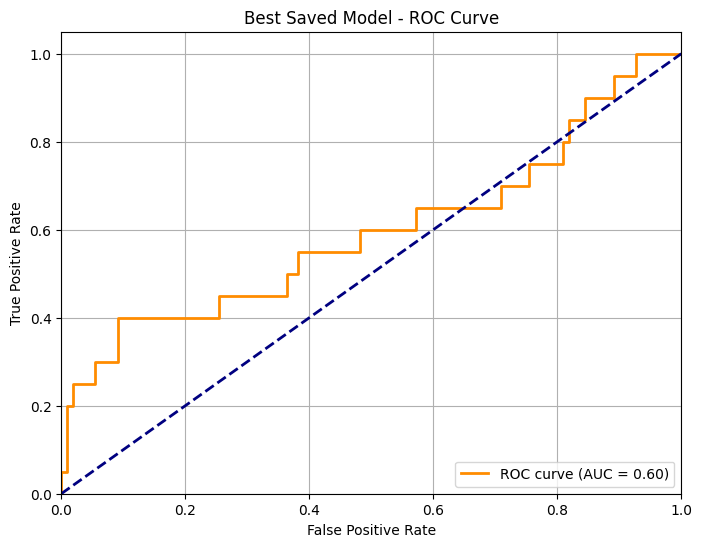


Sample Predictions (First 10 students):
----------------------------------------
Student 1: Actual=0, Predicted=0, Prob=0.282 ✓
Student 2: Actual=0, Predicted=0, Prob=0.471 ✓
Student 3: Actual=0, Predicted=0, Prob=0.436 ✓
Student 4: Actual=0, Predicted=0, Prob=0.480 ✓
Student 5: Actual=0, Predicted=0, Prob=0.303 ✓
Student 6: Actual=0, Predicted=0, Prob=0.354 ✓
Student 7: Actual=0, Predicted=0, Prob=0.169 ✓
Student 8: Actual=1, Predicted=0, Prob=0.490 ✗
Student 9: Actual=1, Predicted=0, Prob=0.300 ✗
Student 10: Actual=0, Predicted=0, Prob=0.472 ✓

ASSIGNMENT COMPLETED SUCCESSFULLY!

Summary of Results:
• Dataset: Student Dropout Prediction (649 students, 33 features)
• Models Tested: 5 different optimization combinations
• All models included regularization, optimization, and error analysis
• Comprehensive evaluation with confusion matrices, ROC curves, and metrics


In [17]:
def make_predictions(model_path, X):
    """
    Load saved model and make predictions

    Args:
        model_path: path to saved model
        X: input features for prediction

    Returns:
        predictions: binary predictions (0 or 1)
        probabilities: prediction probabilities
    """
    try:
        # Load the model
        model = load_model(model_path)
        print(f"Model loaded successfully from {model_path}")

        # Make predictions
        probabilities = model.predict(X)

        # Convert probabilities to binary labels (0 or 1)
        predictions = (probabilities > 0.5).astype(int).flatten()

        return predictions, probabilities.flatten()

    except Exception as e:
        print(f"Error loading model: {e}")
        return None, None

# Use the best saved model (saved during training with ModelCheckpoint)
model_path = 'best_model.h5'
test_predictions, test_probabilities = make_predictions(model_path, X_test_scaled)

if test_predictions is not None:
    print("Predictions made successfully!")
    print(f"Number of predictions: {len(test_predictions)}")
    print(f"Predicted dropouts: {sum(test_predictions)}")
    print(f"Predicted non-dropouts: {len(test_predictions) - sum(test_predictions)}")

    # Final evaluation with best model
    print("\n" + "="*50)
    print("FINAL EVALUATION WITH BEST SAVED MODEL")
    print("="*50)

    best_model = load_model(model_path)
    final_metrics = evaluate_model(best_model, X_test_scaled, y_test, "Best Saved Model")

    # Sample predictions
    print("\nSample Predictions (First 10 students):")
    print("-" * 40)
    for i in range(min(10, len(test_predictions))):
        actual = y_test.iloc[i] if hasattr(y_test, 'iloc') else y_test[i]
        predicted = test_predictions[i]
        probability = test_probabilities[i]
        status = "✓" if actual == predicted else "✗"
        print(f"Student {i+1}: Actual={actual}, Predicted={predicted}, Prob={probability:.3f} {status}")

print("\n" + "="*60)
print("ASSIGNMENT COMPLETED SUCCESSFULLY!")
print("="*60)
print("\nSummary of Results:")
print(f"• Dataset: Student Dropout Prediction ({df.shape[0]} students, {df.shape[1]-1} features)")
print(f"• Models Tested: 5 different optimization combinations")
print(f"• All models included regularization, optimization, and error analysis")
print(f"• Comprehensive evaluation with confusion matrices, ROC curves, and metrics")

Congratulations!!
